# Betting strategies 
# _England Premiere League Results & Odds Dataset_

## I. Introduction

> You do not know anything about sports betting or you want to implement a new strategy? This notebook will help you understand this world, and also provide you a **betting strategy** that you will be able to apply on your own.

In this report, we will take the example of Football, one of the sports with the highest number of bets. More precisely, we will concentrate on **England Premiere League results**, because its great number of matches will allow us to test and build a strategy. 

#### Explanations on betting's vocabulary
First, let's set up the vocabulary. While betting,  _odds_ are linked to each bet you make. Betting odds tell you how likely an event is to happen, and represents how much money you could win if your bet realizes itself.
> For example, you are on a betting website. If the odd is set as 1.40 for "Home team win" and you put 10€ on this odd, if the Home team actually wins (so your prediction realizes itself), you will earn 4€ and get back your first 10€.

There is the possibility to bet on different type of results before a match. Here, we will take into account these type of bets: the number of goals during a game(< 2.5 goals or > 2.5 goals), the other on the match result (Home team wins, Away team wins, Draw match).


## II. Dataset & Variables

The dataset we chose groups the results of the English Premier League matches **from 2008 to 2019**. The variables available are about the matches : the match's **ID**, the match's **date time**, the **Home team**, the **Away team**, the final **number of goals**, the **match result** (Home Team win, Away Team win or Draw Match), the **team's ranking** of the previous Football season (static rank at the end of the past season), the **referee** for the match, the number of **shots**, the number of **fouls**, and the other variables are not directly linked to the match statistics. These other variables are **the odds set before the match** by **different betting websites**. Some of these odds are set on the **number of goals** (< or > than 2.5 goals at the end of the match for the Home or Away Team), while others are set on the **final result** of the match (Home Team win, Away Team win, Draw Match).

## III. Goal of the project & models

The goal of the project is to build a model that can predict the following output : Home Team win, Away Team win or Draw match.
Of course, the model will not predict perfectly the output, but by knowing which match result have the most chances to happen can create some winning bets. This will be done through **Classifications** models

We decided to build two models : 
- One time, we will try to predict a match result based on the **betting websites' predictions**, that can be seen **through the odds** websites put on the possible result. 

- Another time we will use the **Match Statistics**, with the rank of each team, the number of shots/fouls, the number of goals, etc. 

In order to obtain these predictions, we will also try two kind of classifications : **Descision Trees** and **Logistic Regressions**. 

> In the end, we will evaluate the relevance of each classification method, and also define **which independant variables** (Odds or Statitics of the Match) **explained the best the Match Result**.

## IV. Methodology

1. At first, we will import the packages that we will need during this analyse.
2. Then, we will upload, clean and add the necessary variables to complete the Dataset.
3. Some variables will be transformed the variables in a way we can use them properly.  
4. Consequently, we will create the models for each problem, with the two classification methods.
5. We will also evaluate the accuracy of the models and adapt them to reduce the noise.
6. To add, we will integrate some graphics to help a better understanding of the project.
7. Finally, we will draw some conclusions that we can be retrieved from these classfications and methodologies.

> A final retrospective on this project will also be done.




(Unfortunately we did find one with all the variables we were looking for, like the Ex-Rank variable which represent the ranking of the teams for the last season. Our Data contained also a few of missing value so we had to deal with it.) ?

As we face a classification problem with a binary output which is "Win or not Win", we will construct two models with Logistic Regressions, one model with the match's statistics, another with odds as inputs and compare them. We will also use a decision tree with the same inputs and output. Finally, we will compare the two methodologies. 

Finally we will analyse our models and try to tink about how we could improve them and how they could be useful for business.


## 1. Packages

In [539]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. The dataset

The following table shows the 10 first rows of the dataset. It was uploaded from a csv file, and we decided yo name it **_data_**.

In [540]:
#We use the Dataset with the games of the season 2018
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/England_2008_2018_Premiere_League_Final.csv',sep=";")

#data = data.sort_values(by="Match_ID",ascending=True)
# view the first 10 rows 
data.head(10)


,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
data.shape

(4180, 70)

As we can see, we have some NaN variables in our data due to a format change, so we have to remove them.

In [542]:
data = data.drop(["Unnamed: 49", "Unnamed: 50", "Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63","Unnamed: 64","Unnamed: 65","Unnamed: 66","Unnamed: 67","Unnamed: 68","Unnamed: 69"], axis=1)

#We have a new dimension
data.shape

(4180, 49)

We have also seen that some rows were showing _NaN_ data, so we removed them too.

In [543]:
data.dropna(inplace=True)
data.shape

(4176, 49)

Finally, this dataset (without the _NaN_ ) counts **4'176** rows for **49** columns.


## 3. Changing variables types

Now, as we settled up the **types of the variables**. We will change some as int (integer), the date as datetime, while other will remain objects.

In [544]:
data.dtypes

Match_ID                                  int64
Date                                     object
HomeTeam                                 object
AwayTeam                                 object
Home ex-Rank                              int64
Home Team Goals                           int64
Away ex-Rank                              int64
Away Team Goals                           int64
Match Result                             object
Referee                                  object
Home Team Shots                           int64
Away Team Shots                           int64
Home Team Shots on Target                 int64
Away Team Shots on Target                 int64
Home Fouls Committed                      int64
Away Fouls Committed                      int64
Home Corners                              int64
Away Corners                              int64
Home Yellow Cards                         int64
Away Yellow Cards                         int64
Home Red Cards                          

In [545]:
#We have to change the type of some variable (integer)
data['Match_ID'] = data.Match_ID.astype(int)

In [546]:
#We have to change the type of some variable (integer)
data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)

In [547]:
#We have to change the type of some variable (Date)
data['Date'] = pd.to_datetime(data['Date'],)


In [548]:
data.dtypes

Match_ID                                         int64
Date                                    datetime64[ns]
HomeTeam                                        object
AwayTeam                                        object
Home ex-Rank                                     int64
Home Team Goals                                  int64
Away ex-Rank                                     int64
Away Team Goals                                  int64
Match Result                                    object
Referee                                         object
Home Team Shots                                  int64
Away Team Shots                                  int64
Home Team Shots on Target                        int64
Away Team Shots on Target                        int64
Home Fouls Committed                             int64
Away Fouls Committed                             int64
Home Corners                                     int64
Away Corners                                     int64
Home Yello


## 4. Tendencies through scatter plots

A match has 3 different possible results (the Home Team wins, the Away Team wins or a Draw match). Each of these results are likely to happen, or not happen. This fact shows the need of a binary variable, for each of the match result.

In [549]:
#We wo, one for the Home team wins, one for the draws and one for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])

Before building the graphs, we will normalise the odds numbers to better the comparison between the graphs. It will create a common scale for all the odds.


In [550]:
from sklearn import preprocessing
# separate the data from the target attributes
#X = data['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
# normalisation par formule (x - x.min()) / (x.max() - x.min())
cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Interwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
data[cols_to_norm].head(10)

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Interwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.006381,0.250000,0.348044,0.008521,0.234234,0.254373,0.007916,0.248619,0.354376,0.006015,0.264706,0.242424,0.009112,0.280,0.237866
1,0.035096,0.035714,0.084754,0.035088,0.036036,0.093777,0.036939,0.038674,0.110473,0.037594,0.029412,0.064171,0.036446,0.072,0.073406
2,0.042844,0.021429,0.072217,0.040100,0.031532,0.082306,0.050132,0.027624,0.078192,0.045113,0.029412,0.053030,0.045558,0.064,0.057361
3,0.070191,0.014286,0.042126,0.070175,0.022523,0.043590,0.071240,0.027624,0.053085,0.072682,0.009804,0.033422,0.070615,0.072,0.033293
4,0.097539,0.028571,0.028335,0.087719,0.027027,0.033553,0.097625,0.027624,0.038737,0.092732,0.039216,0.022950,0.097950,0.072,0.023265
5,0.202370,0.042857,0.013791,0.197995,0.040541,0.015486,0.182058,0.060773,0.019010,0.223058,0.049020,0.010027,0.202733,0.104,0.010229
6,0.038742,0.028571,0.077232,0.042607,0.027027,0.076570,0.039578,0.038674,0.096126,0.039098,0.039216,0.058601,0.038724,0.080,0.064380
7,0.038742,0.028571,0.080491,0.045113,0.027027,0.070835,0.050132,0.027624,0.078192,0.043108,0.039216,0.053030,0.038724,0.080,0.064380
8,0.012306,0.142857,0.222668,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.012531,0.137255,0.164439,0.012756,0.200,0.197754
9,0.010483,0.178571,0.247743,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.010025,0.166667,0.197861,0.010478,0.240,0.217810


To build a betting strategy, it is first relevant to know how frequently the betting companies makes right predicting or not. So, in order to understand this fact, we will build three different scatter plot, showing the realised and not realised predictions :

- When the official result is the victory of the home team crossed with the "Home team win" odd.
- When the official result is the victory of the away team crossed with the "Away team win" odd.
- When the official result is draw match crossed with the "Draw"odd.

We will build scatter plots for each of the 3 differents possible results we have in a match, and compare them with the odds.

1. **Home team wins scenario**: if the Home team wins the output is 1,  otherwise it's 0.

In [551]:
# number of Homewin vs No Home win
Homewin = data["Match Result_H"].value_counts()[1]
NoHomewin = data["Match Result_H"].value_counts()[0]
print("Home won:", Homewin)
print("Home did not win:", NoHomewin)

Home won: 1929
Home did not win: 2247


In [552]:
# Base rate 
# the base rate of the No Home Win
BaseRate = NoHomewin/data['Match Result_H'].count()
BaseRate

0.5380747126436781

**Interpretation**: We can see that we have a almost 50-50 repartition.

[Text(0, 0.5, 'Home team won [1]'),
 Text(0.5, 0, 'Website Odd while Home Team wins')]

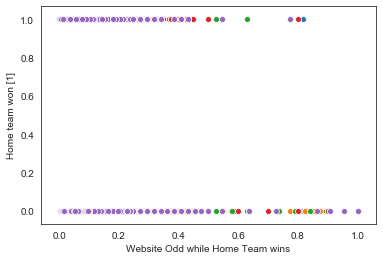

In [553]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#tips = sns.load_dataset(data)

a_B365_Home = sns.scatterplot(x="B365 Home", y="Match Result_H", data=data)

a_BetWin_Home = sns.scatterplot(x="Bet&Win Home", y="Match Result_H", data=data)

a_Interwetten_Home = sns.scatterplot(x="Interwetten Home", y="Match Result_H", data=data)

a_WilliamHill_Home = sns.scatterplot(x="William Hill Home", y="Match Result_H", data=data)

a_VCBet_Home = sns.scatterplot(x="VC Bet Home", y="Match Result_H", data=data)

a_VCBet_Home.set(xlabel='Website Odd while Home Team wins', ylabel='Home team won [1]')


**Interpretation:** As we can see the higher the odd is, the less a team has chance to win. However, it still happen sometimes.


2. **Away team wins scenario**: if the Away team wins the output is 1,  otherwise it's 0.

In [554]:
# number of Away win vs No Away win
Awaywin = data["Match Result_A"].value_counts()[1]
NoAwaywin = data["Match Result_A"].value_counts()[0]
print("Away won:", Awaywin)
print("Away did not win:", NoAwaywin)

Away won: 1210
Away did not win: 2966


In [555]:
# Base rate 
# the base rate of the No Home Win
BaseRateA = NoAwaywin/data['Match Result_A'].count()
BaseRateA

0.7102490421455939

**Interpretation**: We can see that we have a almost 70-30 repartition.

[Text(0, 0.5, 'Away team won [1]'),
 Text(0.5, 0, 'Website Odd while Away Team wins')]

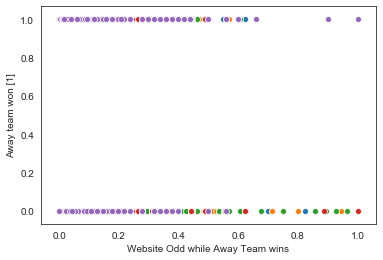

In [556]:
a_B365_Away = sns.scatterplot(x="B365 Away", y="Match Result_A", data=data)

a_BetWin_Away = sns.scatterplot(x="Bet&Win Away", y="Match Result_A", data=data)

a_Interwetten_Away = sns.scatterplot(x="Interwetten Away", y="Match Result_A", data=data)

a_WilliamHill_Away = sns.scatterplot(x="William Hill Away", y="Match Result_A", data=data)

a_VCBet_Away = sns.scatterplot(x="VC Bet Away", y="Match Result_H", data=data)

a_VCBet_Away.set(xlabel='Website Odd while Away Team wins', ylabel='Away team won [1]')


**Interpretation:** We can observe the same trend as the previous graph.

3. **Draw match scenario**: if the result is draw, the output is 1,  otherwise it's 0.

In [557]:
# number of Draw vs No Draw
Draw = data["Match Result_D"].value_counts()[1]
NoDraw = data["Match Result_D"].value_counts()[0]
print("Draw match:", Draw)
print("No Draw match:", NoDraw)

Draw match: 1037
No Draw match: 3139


In [558]:
# Base rate 
# the base rate of the No Draw
BaseRateD = NoDraw/data['Match Result_D'].count()
BaseRateD

0.751676245210728

**Interpretation**: We can see that we have a almost 75-25 repartition.

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

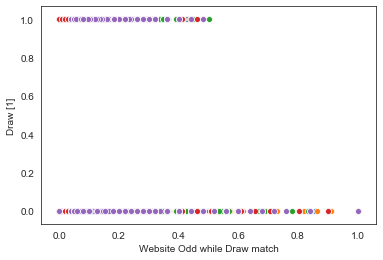

In [559]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Interwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

**Interpretation:** We can observe the same trend as the previous graph for the small odds. However, the high odds just never realize themselves.


#### In conclusion of these scatter plots, we will only analize if the Homte team wins, and if the Away team wins. The results of the the Draw odds is not interesting for building a betting strategy on it, while there are no chances to get high amounts.

Mettre plus explications? voir 

## 5. Comparison between two Classification models

We will compare two model:

> - **Logistic Regressions**: comparing the Odd prediction to the statistics of the match prediction
> - **Decision Trees**: comparing the Odd prediction to the statistics of the match prediction

### 5.1 Logistic Regression

#### I. With the odds

**Here is the 1st logistic regression for Home Team Win:**

In [560]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [561]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


In [562]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [563]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [564]:
# best regulariser parameter
LR.C_

array([0.05])

In [565]:
# train accuracy
LR.score(X_train,y_train)

0.6422155688622755

In [566]:
# test accuracy
LR.score(X_test, y_test)

0.6016746411483254

In [567]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[1209,  572],
       [ 623,  936]])

Confusion matrix, without normalization


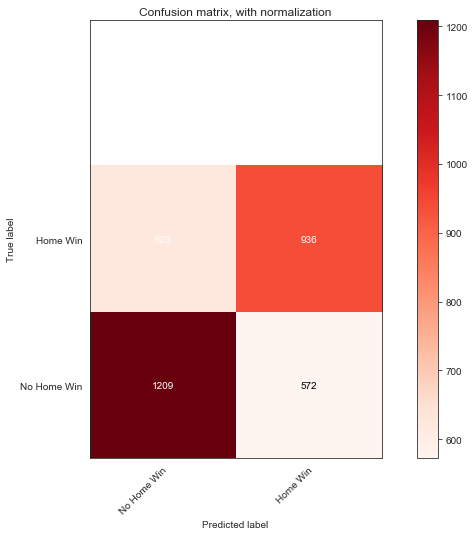

In [568]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home Win", "Home Win"])
    ax.yaxis.set_ticklabels(["No Home Win", "Home Win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')


In [569]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)
# precision (60.42% of the games were a Home win )

Recall = recall_score(y_train, y_pred)


print(Recall)
# recall (only 75.8% of the Home wins have been correctly identified)


0.6206896551724138
0.600384862091084



**Here is the 2nd logistic regression for Draws:**

In [570]:
feature_names = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [571]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [572]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [573]:
LRD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [574]:
# best regulariser parameter
LRD.C_

array([0.])

In [575]:
# train accuracy
LRD.score(X_train,y_train)

0.7547904191616767

In [576]:
# test accuracy
LRD.score(X_test, y_test)

0.7392344497607656

In [577]:
LRD.score(X_train,y_train)

0.7547904191616767

In [578]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRD.predict(X_train))

array([[2521,    0],
       [ 819,    0]])

Confusion matrix, with normalization


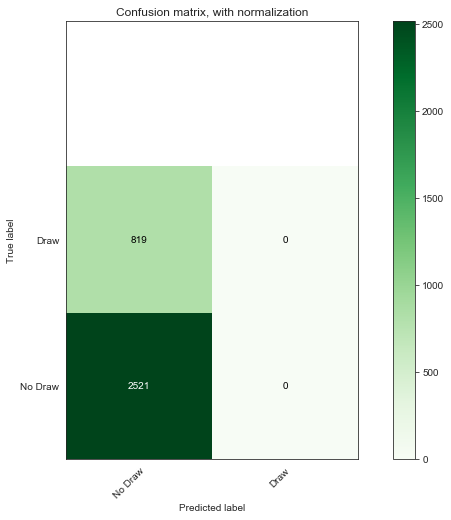

In [579]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



**Here is the 3rd logistic regression for Away wins:**

In [580]:
feature_names = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [581]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [582]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [583]:
LRA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [584]:
# best regulariser parameter
LRA.C_

array([0.])

In [585]:
# train accuracy
LRA.score(X_train,y_train)

0.7119760479041917

In [586]:
# test accuracy
LRA.score(X_test, y_test)

0.7033492822966507

In [587]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRA.predict(X_train))

array([[2378,    0],
       [ 962,    0]])

Confusion matrix, with normalization


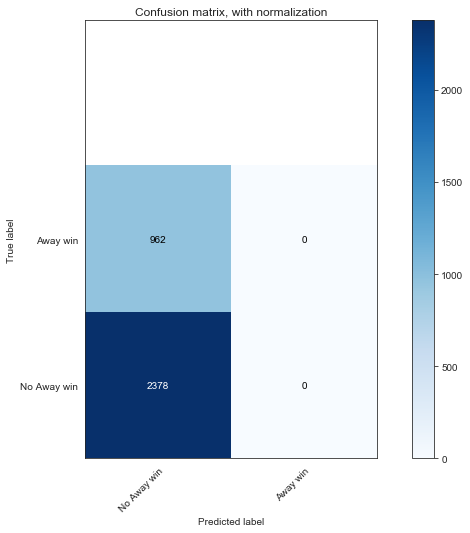

In [588]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



#### II. With the Match Statistics

**Logistic Regression for Home winwith statistics**


In [589]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [590]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [591]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [592]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [593]:
# best regulariser parameter
LR_MS.C_

array([2.78])

In [594]:
# train accuracy
LR_MS.score(X_train,y_train)

0.7143712574850299

In [595]:
# test accuracy
LR_MS.score(X_test, y_test)

0.6854066985645934

In [596]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MS.predict(X_train))

array([[1360,  421],
       [ 533, 1026]])

**Logistic Regression for Draws with statistics**

In [597]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [598]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [599]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [600]:
LR_MSD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [601]:
# best regulariser parameter
LR_MSD.C_

array([0.01])

In [602]:
# train accuracy
LR_MSD.score(X_train,y_train)

0.7550898203592814

In [603]:
# test accuracy
LR_MSD.score(X_test, y_test)

0.7380382775119617

In [604]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSD.predict(X_train))

array([[2521,    0],
       [ 818,    1]])

Confusion matrix, with normalization


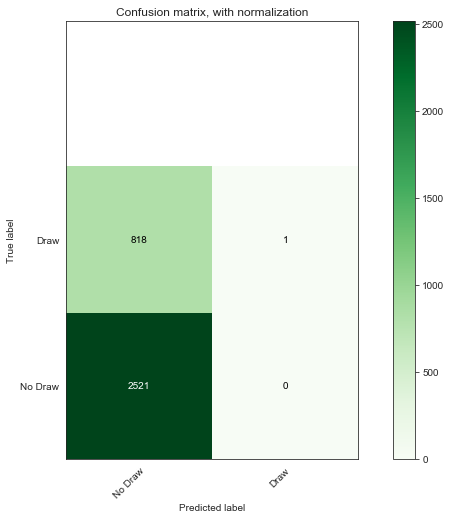

In [605]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')

**Logistic Regression for Away win with statistics**

In [606]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [607]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [608]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [609]:
LR_MSA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [610]:
# best regulariser parameter
LR_MSA.C_

array([0.05])

In [611]:
# train accuracy
LR_MSA.score(X_train,y_train)

0.7778443113772455

In [612]:
# test accuracy
LR_MSA.score(X_test, y_test)

0.7607655502392344

In [613]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSA.predict(X_train))

array([[2190,  188],
       [ 554,  408]])

Confusion matrix, with normalization


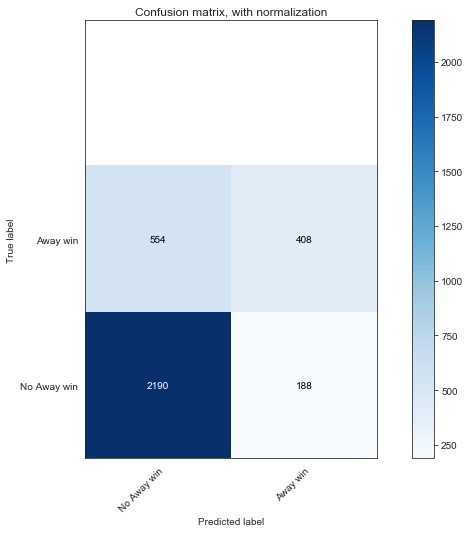

In [614]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### 5.2 Decision Trees

#### I. With the Odds

**Decision Tree for Home win**

In [615]:
from sklearn.tree import DecisionTreeClassifier

In [616]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = data[feature_names]
y = data["Match Result_H"]


In [617]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [618]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=32,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [619]:
# test accuracy
clf.score(X_test,y_test)

0.5466507177033493

In [620]:
# depth of the decision tree
Depth = clf.get_depth()

In [621]:
#clf = DecisionTreeClassifier(criterion='entropy')
scores = [clf.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

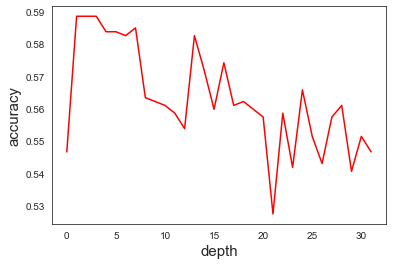

In [622]:
plt.plot(scores,"r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [623]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 1


In [624]:
clfMax = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [625]:
clfMax.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [626]:
clfMax.score(X_test,y_test)

0.5885167464114832

**Decision Tree for Draw**

In [627]:
feature_namesD = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = data[feature_names]
y = data["Match Result_D"]


In [628]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [629]:
clfD = DecisionTreeClassifier(criterion='entropy')

In [630]:
clfD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [631]:
# test accuracy
clfD.score(X_test,y_test)

0.6052631578947368

In [632]:
# depth of the decision tree
Depth = clfD.get_depth()

In [633]:
scores = [clfD.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

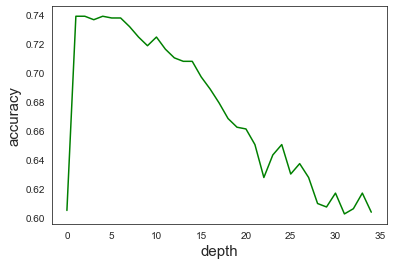

In [634]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [635]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 1


In [636]:
clfMaxD = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [637]:
clfMaxD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [638]:
clfMaxD.score(X_test,y_test)

0.7392344497607656

**Decision Tree for Away win**

In [639]:
feature_namesA = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = data[feature_names]
y = data["Match Result_A"]


In [640]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [641]:
clfA = DecisionTreeClassifier(criterion='entropy')

In [642]:
clfA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [643]:
# test accuracy
clfA.score(X_test,y_test)

0.6483253588516746

In [644]:
# depth of the decision tree
Depth = clfA.get_depth()

In [645]:
scores = [clfA.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

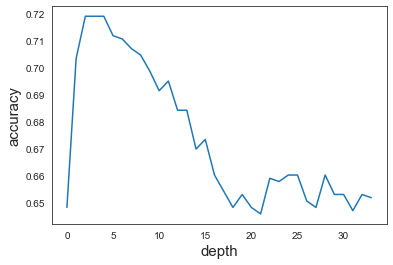

In [646]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [647]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 2


In [648]:
clfMaxA = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [649]:
clfMaxA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [650]:
clfMaxA.score(X_test,y_test)

0.7188995215311005

#### II. With the Match Statistics

**Match Statistics for Home win**

In [651]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [652]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [653]:
clfHS = DecisionTreeClassifier(criterion='entropy')

In [654]:
clfHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [655]:
# test accuracy
clfHS.score(X_test,y_test)

0.5980861244019139

In [656]:
# depth of the decision tree
clfHS.get_depth()

24

In [657]:
scores = [clfHS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

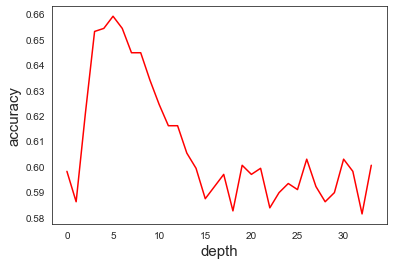

In [658]:
plt.plot(scores, "r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [659]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 5


In [660]:
clfMaxHS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [661]:
clfMaxHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [662]:
clfMaxHS.score(X_test,y_test)

0.6590909090909091

**Match Statistics for Draw**

In [663]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [664]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [665]:
clfDS = DecisionTreeClassifier(criterion='entropy')

In [666]:
clfDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [667]:
# test accuracy
clfDS.score(X_test,y_test)

0.6267942583732058

In [668]:
# depth of the decision tree
clfDS.get_depth()

34

In [669]:
scores = [clfDS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

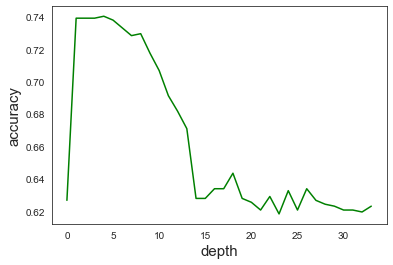

In [670]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [671]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


In [672]:
clfMaxDS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [673]:
clfMaxDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [674]:
clfMaxDS.score(X_test,y_test)

0.7404306220095693

**Match Statistics for Away**

In [675]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [676]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [677]:
clfAS = DecisionTreeClassifier(criterion='entropy')

In [678]:
clfAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [679]:
# test accuracy
clfAS.score(X_test,y_test)

0.7069377990430622

In [680]:
# depth of the decision tree
clfAS.get_depth()

23

In [681]:
scores = [clfAS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

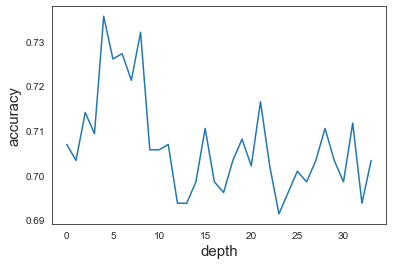

In [682]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [683]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


In [684]:
clfMaxAS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [685]:
clfMaxAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [686]:
clfMaxAS.score(X_test,y_test)

0.7356459330143541